In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("cars.csv")

In [3]:
data.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
data.shape

(205, 26)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
data.isna().sum().sort_values(ascending=False)

car_ID              0
symboling           0
highwaympg          0
citympg             0
peakrpm             0
horsepower          0
compressionratio    0
stroke              0
boreratio           0
fuelsystem          0
enginesize          0
cylindernumber      0
enginetype          0
curbweight          0
carheight           0
carwidth            0
carlength           0
wheelbase           0
enginelocation      0
drivewheel          0
carbody             0
doornumber          0
aspiration          0
fueltype            0
CarName             0
price               0
dtype: int64

In [8]:
print(f"Number of unique cars: {len(data.CarName.unique())}")

Number of unique cars: 147


/home/crasious/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


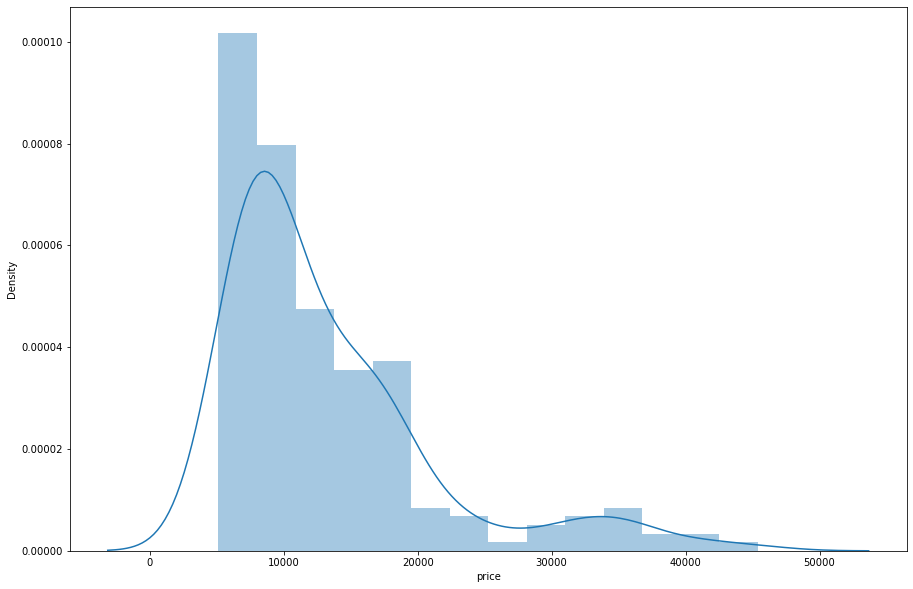

In [9]:
plt.figure(figsize=(15, 10))
sns.distplot(data.price, kde=True)
plt.show()

# Only use numerical features for now

In [10]:
data_num = data.select_dtypes(include = 'number')
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   wheelbase         205 non-null    float64
 3   carlength         205 non-null    float64
 4   carwidth          205 non-null    float64
 5   carheight         205 non-null    float64
 6   curbweight        205 non-null    int64  
 7   enginesize        205 non-null    int64  
 8   boreratio         205 non-null    float64
 9   stroke            205 non-null    float64
 10  compressionratio  205 non-null    float64
 11  horsepower        205 non-null    int64  
 12  peakrpm           205 non-null    int64  
 13  citympg           205 non-null    int64  
 14  highwaympg        205 non-null    int64  
 15  price             205 non-null    float64
dtypes: float64(8), int64(8)
memory usage: 25.8 K

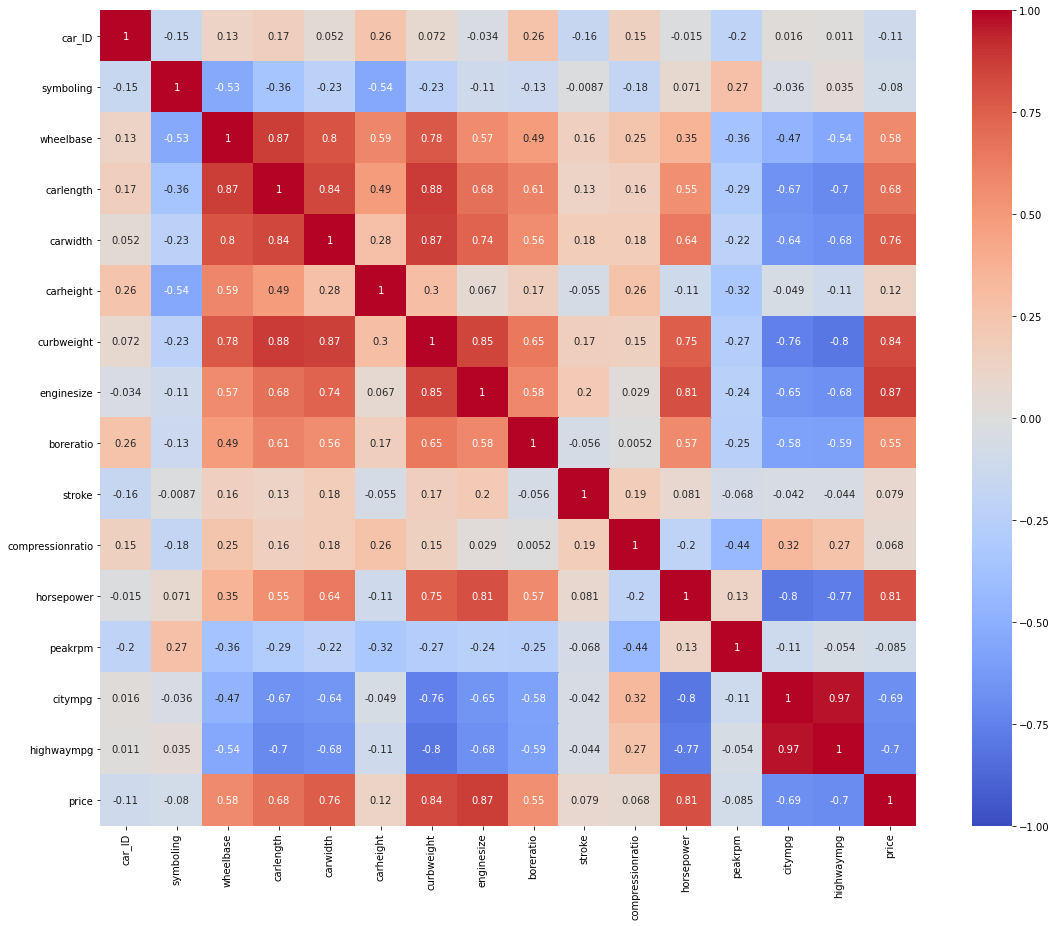

In [11]:
plt.figure(figsize=(20, 15))
correlations = data_num.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True, vmin=-1, vmax=1, square=True)
plt.show()

In [12]:
data_num.corr()['price'].abs().sort_values(ascending=False)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
highwaympg          0.697599
citympg             0.685751
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
car_ID              0.109093
peakrpm             0.085267
symboling           0.079978
stroke              0.079443
compressionratio    0.067984
Name: price, dtype: float64

## Check Linearity

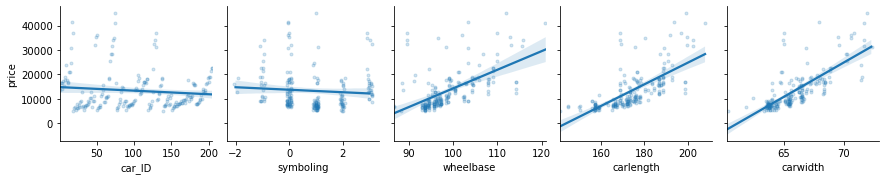

In [13]:
sns.pairplot(data_num, x_vars=data_num.columns.drop('price')[:5], y_vars=['price'], markers='.',
             plot_kws={'x_jitter': 0.1, 'y_jitter': 0.1, 'scatter_kws': {'alpha': 0.2}},
             kind='reg')

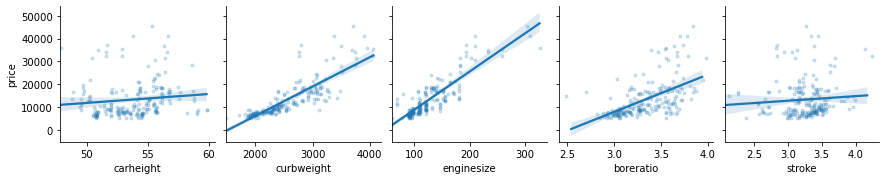

In [14]:
sns.pairplot(data_num, x_vars=data_num.columns.drop('price')[5:10], y_vars=['price'], markers='.',
             plot_kws={'x_jitter': 0.1, 'y_jitter': 0.1, 'scatter_kws': {'alpha': 0.2}},
             kind='reg')

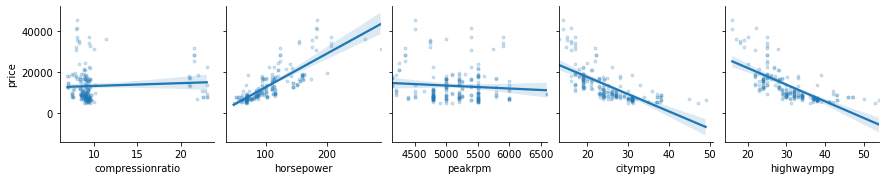

In [15]:
sns.pairplot(data_num, x_vars=data_num.columns.drop('price')[10:15], y_vars=['price'], markers='.',
             plot_kws={'x_jitter': 0.1, 'y_jitter': 0.1, 'scatter_kws': {'alpha': 0.2}},
             kind='reg')

In [16]:
# Choose the top 8 correlated features
X = data_num[data_num.corr()['price'].abs().sort_values(ascending=False)[1:8].index.to_list()]

# select our target variable
y = data_num["price"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [18]:
# Check the shapes
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (164, 7)
y_train: (164,)
X_test: (41, 7)
y_test: (41,)


In [19]:
from sklearn.linear_model import LinearRegression # implementation of linear regression
from sklearn.model_selection import train_test_split # for creating a train and test set
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # for evaluating our model

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
preds_test = model.predict(X_test)

In [22]:
mae_without_categorical = mean_absolute_error(y_test, preds_test)
rmse_without_categorical = mean_squared_error(y_test, preds_test, squared=False)

print('MAE:', mae_without_categorical )
print('RMSE:', rmse_without_categorical)

MAE: 1615.2087434659402
RMSE: 2375.137844474649


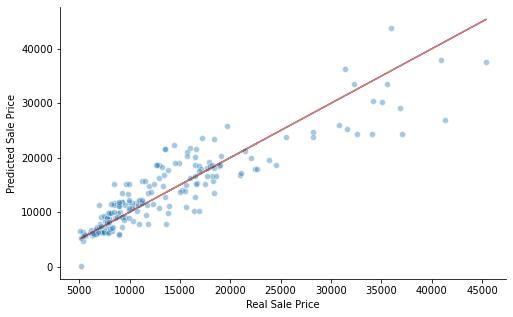

In [23]:
preds = model.predict(X)

plt.figure(figsize=(8,5))
plt.scatter(y, preds, alpha=0.4, linewidths=1, edgecolors='white')
plt.plot(y, y, color='darkred', alpha=0.5)
plt.xlabel('Real Sale Price')
plt.ylabel('Predicted Sale Price')
sns.despine()

In [24]:
r2_numbers = r2_score(y, preds)
print(f"r2 score with only numerical features: {r2_numbers}")

r2 score with only numerical features: 0.820018663083138


In [25]:
params = pd.DataFrame({'Features': X.columns, 'Coefficients': model.coef_})
params

,Features,Coefficients
0,enginesize,78.636795
1,curbweight,3.554779
2,horsepower,51.658146
3,carwidth,645.438471
4,highwaympg,154.191603
5,citympg,-112.149525
6,carlength,-36.319139


# Do the same but try with categorial features included

In [26]:
# apply one-hot encoding 
data_onehot = pd.get_dummies(data, drop_first=True)

data_onehot.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


In [27]:
# select the 11 most highly correlated features with the target variable to be our features
X_onehot = data_onehot[data_onehot.corr()['price'].abs().sort_values(ascending=False)[1:12].index.to_list()]

# select our target variable
y_onehot = data_onehot["price"]

In [28]:
# perform the train/test split with random_state=123
X_onehot_train, X_onehot_test, y_onehot_train, y_onehot_test = train_test_split(X_onehot, y_onehot, test_size=0.2, random_state=123)

<AxesSubplot:>

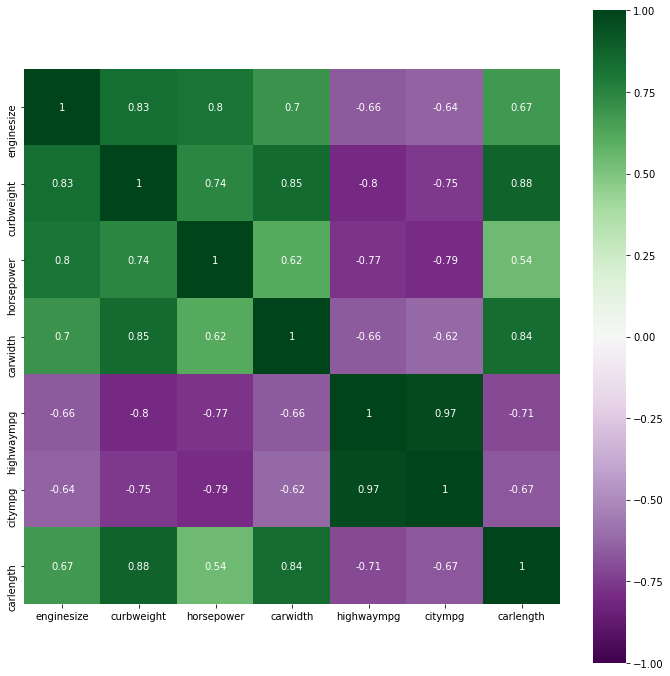

In [29]:
# visualise correlation coefficients
plt.figure(figsize=(12, 12))
sns.heatmap(X_train.corr(), square=True, cmap='PRGn', vmin=-1, vmax=1, annot=True)

In [30]:
# instantiate model class object
model_onehot = LinearRegression()

# fit model to the training set
model_onehot.fit(X_onehot_train, y_onehot_train)

LinearRegression()

In [31]:
# use our model to generate predictions for the test set
preds_test_onehot = model_onehot.predict(X_onehot_test)

In [32]:
# evaluate how good these predictions are using mae and rmse
mae_with_categorical = mean_absolute_error(y_onehot_test, preds_test_onehot)
rmse_with_categorical = mean_squared_error(y_onehot_test, preds_test_onehot, squared=False)

print('MAE:', mae_with_categorical )
print('RMSE:', rmse_with_categorical)

MAE: 1350.5866506027526
RMSE: 2144.823335463157


In [33]:
r2_categorical = r2_score(y_onehot_test, preds_test_onehot )
r2_categorical

0.8844801104384629

In [34]:
# lets have a look at our models parameters or coefficients
params = pd.DataFrame({'Features': X.columns, 'Coefficients': model.coef_})
params

,Features,Coefficients
0,enginesize,78.636795
1,curbweight,3.554779
2,horsepower,51.658146
3,carwidth,645.438471
4,highwaympg,154.191603
5,citympg,-112.149525
6,carlength,-36.319139


In [35]:
print(f"MAE without categorical: {mae_without_categorical}, MAE with categorical: {mae_with_categorical}")
print(f"RMSE without categorical: {rmse_without_categorical}, RMSE with categorical: {rmse_with_categorical}")
print(f"R2 without categorcial: {r2_numbers}, R2 with categorcial: {r2_categorical}")

MAE without categorical: 1615.2087434659402, MAE with categorical: 1350.5866506027526
RMSE without categorical: 2375.137844474649, RMSE with categorical: 2144.823335463157
R2 without categorcial: 0.820018663083138, R2 with categorcial: 0.8844801104384629


## Try dropping highly correlated features

<AxesSubplot:>

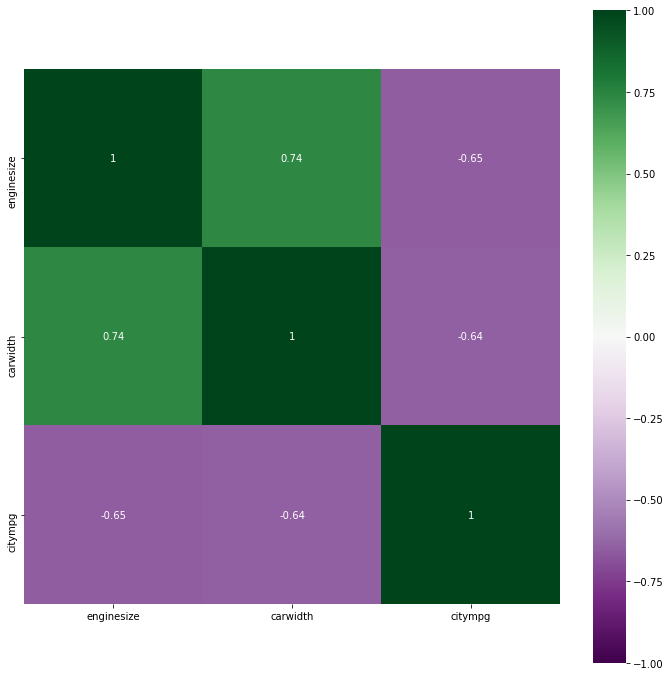

In [36]:
X_reduced = X.drop(['highwaympg','curbweight','carlength','horsepower'], axis=1)
# visualise correlation coefficients
plt.figure(figsize=(12, 12))
sns.heatmap(X_reduced.corr(), square=True, cmap='PRGn', vmin=-1, vmax=1, annot=True)

In [37]:
# instantiate model class object
model= LinearRegression()

# fit model to the training set
model.fit(X_reduced, y)

LinearRegression()

In [38]:
# make predictions across the entire dataset
preds = model.predict(X_reduced)

In [39]:
# calculate r2 metric
r2 = r2_score(y, preds)
r2

0.8040783486302132

In [40]:
# lets have a look at our models parameters or coefficients
params = pd.DataFrame({'Features': X_reduced.columns, 'Coefficients': model.coef_})
params

,Features,Coefficients
0,enginesize,121.166741
1,carwidth,757.796408
2,citympg,-173.551763


## Independence and homoscedasticity

In [41]:
# calculate the residuals
residuals = y - preds

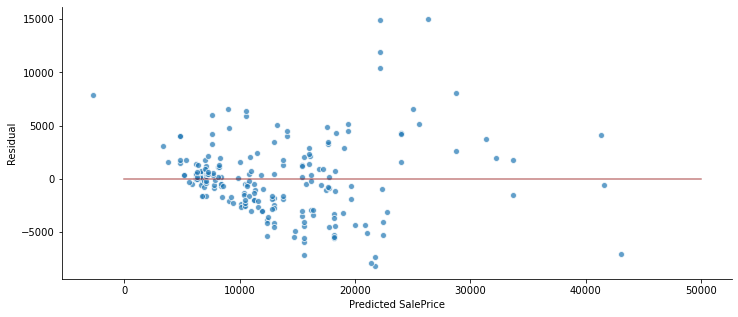

In [42]:
# plot predicted sale price vs residuals
plt.figure  (figsize=(12, 5))
plt.scatter(preds, residuals, alpha=0.7, linewidths=1, 
            edgecolors='white')
plt.plot([0,50000],[0,0], color='darkred', alpha=0.5)
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residual')
sns.despine()

## Attempt to fix heteroscedasticity

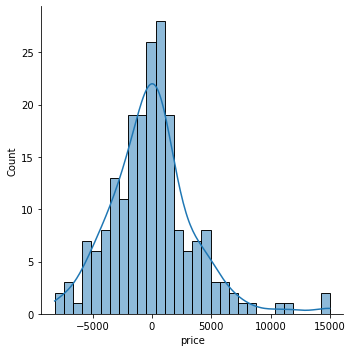

In [43]:
# view the distribution of the residuals
sns.displot(residuals, kde=True, bins=30)

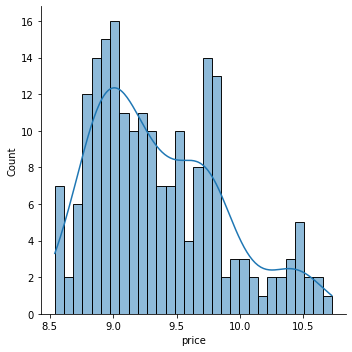

In [44]:
# take the logarithm of y
log_y = np.log(y)

# distribution of target variable
sns.displot(log_y, kde=True, bins=30)

In [45]:
# calculate the residuals
residuals = log_y - preds

In [46]:
# to scale our data so that we can perform "sensible" clustering
from sklearn.preprocessing import scale

# to provide an implementation of the k-means algorithm
from sklearn.cluster import KMeans

# to provide an implementation of PCA for reducing the dimensionality of our data
from sklearn.decomposition import PCA

In [47]:
# create a KMeans class object and choose the number of clusters k
KMeans_model = KMeans(n_clusters = 3, random_state = 123)

# fit the model to our scaled features
KMeans_model.fit(scale(X_train))

KMeans(n_clusters=3, random_state=123)

In [48]:
# create a list of different values of k to evaluate
k_values = list(range(2,15))

# create new models for each value of k and grab the models inertia_ 
# (i.e the within-cluster sum of squares which is essentially a measure of variance)
variances = [KMeans(k).fit(scale(X_train)).inertia_ for k in k_values]

/home/crasious/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


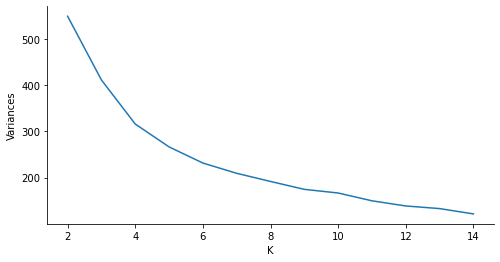

In [49]:
# visualise and look for 'kink' or 'elbow' in the graph
plt.figure(figsize=(8,4))
sns.lineplot(k_values, variances)

plt.xlabel("K")
plt.ylabel("Variances")
sns.despine()

In [50]:
# add our cluster labels as a new column to our original training set features
X_train['cluster'] = KMeans_model.labels_
X_train.head()

/home/crasious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,enginesize,curbweight,horsepower,carwidth,highwaympg,citympg,carlength,cluster
197,141,3042,114,67.2,28,24,188.8,0
112,152,3252,95,68.4,33,28,186.7,0
95,97,2028,69,63.8,37,31,165.6,1
169,146,2551,116,65.6,30,24,176.2,2
184,97,2264,52,65.5,46,37,171.7,1


In [51]:
# we want to reduce the dimensionality of our data to 2 dimensions for easy visualization
pca = PCA(n_components=2)

# fit our pca object to the scaled data
X_train_pca = pca.fit_transform(scale(X_train.drop('cluster', axis=1)))

# explained variance is the fraction of the total variance in the entire dataset that a principal component accounts for
pca.explained_variance_ratio_

array([0.77791747, 0.09863118])

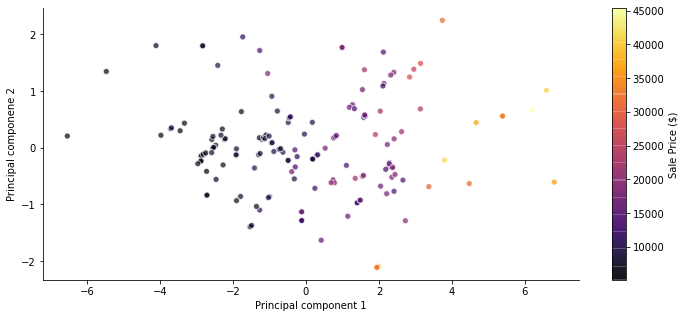

In [52]:
# lets visualize our data in our reduced 2-dimensional space
plt.figure  (figsize=(12, 5))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, alpha=0.7, linewidths=1, 
            edgecolors='white', cmap='inferno')
plt.xlabel('Principal component 1')
plt.ylabel('Principal componene 2')
sns.despine()
plt.colorbar(label='Sale Price ($)')
plt.show()

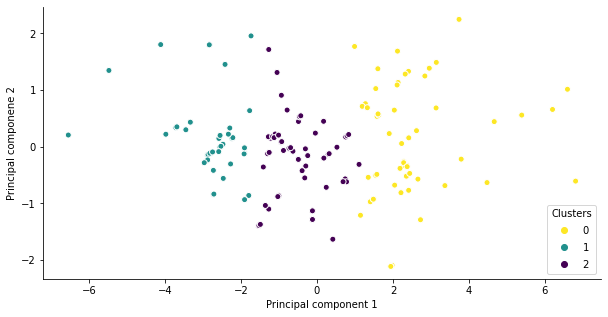

In [53]:
#visualise our data in our reduced 2-dimensional space
plt.figure(figsize=(10, 5))
plot = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=X_train['cluster'], linewidths=1,
                   edgecolors='white', cmap='viridis_r')
plt.xlabel('Principal component 1')
plt.ylabel('Principal componene 2')
plt.legend(*plot.legend_elements(), loc="lower right", title="Clusters")
sns.despine()
plt.show()

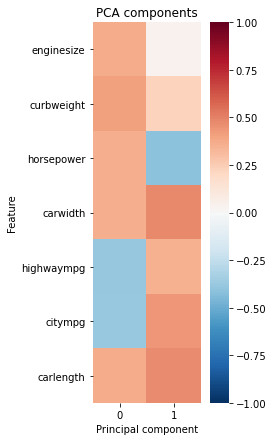

In [54]:
plt.figure(figsize=(3,7))
sns.heatmap(pd.DataFrame(pca.components_,columns=X_train.drop('cluster', axis=1).columns).transpose(), 
            cmap='RdBu_r', vmin=-1, vmax=1, square=True)
plt.xlabel('Principal component')
plt.ylabel('Feature')
plt.title('PCA components')
plt.show()

In [55]:
X_train = pd.get_dummies(X_train, columns=['cluster'], drop_first=True)

In [56]:
# instantiate model class object
model2 = LinearRegression()

# fit model to the training set
model2.fit(X_train, y_train)

LinearRegression()

In [57]:
X_test['cluster'] = KMeans_model.predict(scale(X_test))
X_test = pd.get_dummies(X_test, columns=['cluster'], drop_first=True)

/home/crasious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [58]:
preds_test = model2.predict(X_test)

In [59]:
mae = mean_absolute_error(y_test, preds_test)
rmse = mean_squared_error(y_test, preds_test, squared=False)

print('MAE:', mae)
print('RMSE:', rmse)

MAE: 1594.339991588597
RMSE: 2311.786293478125


In [60]:
X = data_onehot.drop('price', axis=1)
y = data_onehot['price']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


In [62]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
model.score(X_test, predictions)

1.0

In [63]:
mae = mean_absolute_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

print('MAE:', mae)
print('RMSE:', rmse)

MAE: 1294.0406585365854
RMSE: 1611.007069399706


In [64]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [0.85719627 0.86660308 0.94216775 0.80710054 0.86395814]
Mean Cross-Validation Score: 0.8674051569771695
